In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
import math
import matplotlib as mpl
from iminuit import Minuit

In [4]:
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

# Set the background color of the plot to ghostwhite
axes = {'facecolor': 'ghostwhite'}
mpl.rc('axes', **axes)

# Set custom color cycle
custom_colors= ['dodgerblue', 'red', 'lightgreen', 'orange', 'orchid', 'navy']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

# Set inside tickmarks
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

# Exercise 1

In [30]:
n = 100    # Number of coins 
p = 66     # Probability of getting 
p_range = np.linspace(0, 1, 1000)

alpha = 5
beta = 17 

def beta_distribution(x, alpha, beta):
    return scipy.stats.beta.pdf(x, alpha, beta)

def binomial_distribution(x, n, p):
    return scipy.stats.binom.pmf(x, n, p)

prior = beta_distribution(p_range, alpha, beta)
prior /= scipy.integrate.trapz(prior, p_range)

likelihood = binomial_distribution(p, n, p_range)
likelihood /= scipy.integrate.trapz(likelihood, p_range)

posterior = prior * likelihood
posterior /= scipy.integrate.trapz(posterior, p_range)

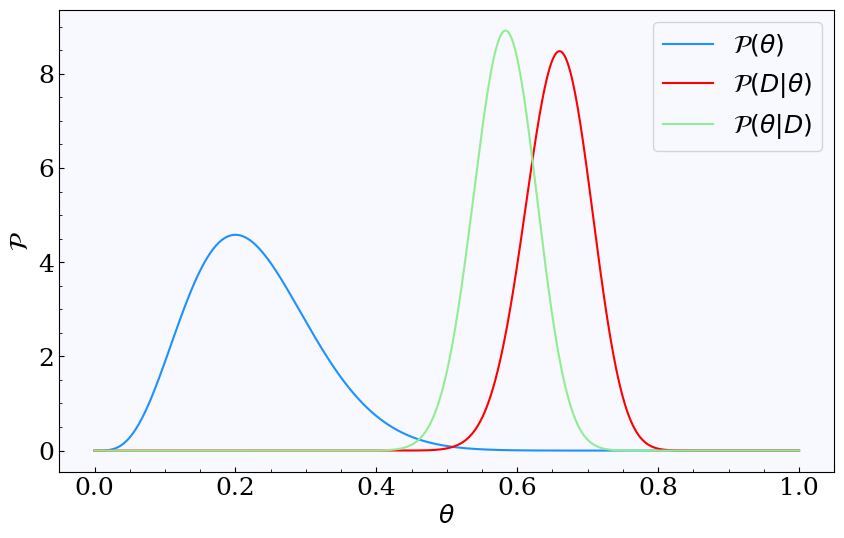

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(p_range, prior, label=r'$\mathcal{P}(\theta)$')
ax.plot(p_range, likelihood, label=r'$\mathcal{P}(D|\theta)$')
ax.plot(p_range, posterior, label=r'$\mathcal{P}(\theta|D)$')

ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\mathcal{P}$')
ax.legend()


# Exercise 2 

In [27]:
N_iterations = 15
chain1 = np.zeros(N_iterations)
chain2 = np.zeros(N_iterations)

chain1[0] = 100
chain2[0] = -27

def setp(x):
    mu = 0.5 * x
    next_x = np.random.normal(mu, 1, size=1)
    return next_x


for i in range(1, N_iterations):
    chain1[i] = setp(chain1[i-1])
    chain2[i] = setp(chain2[i-1])

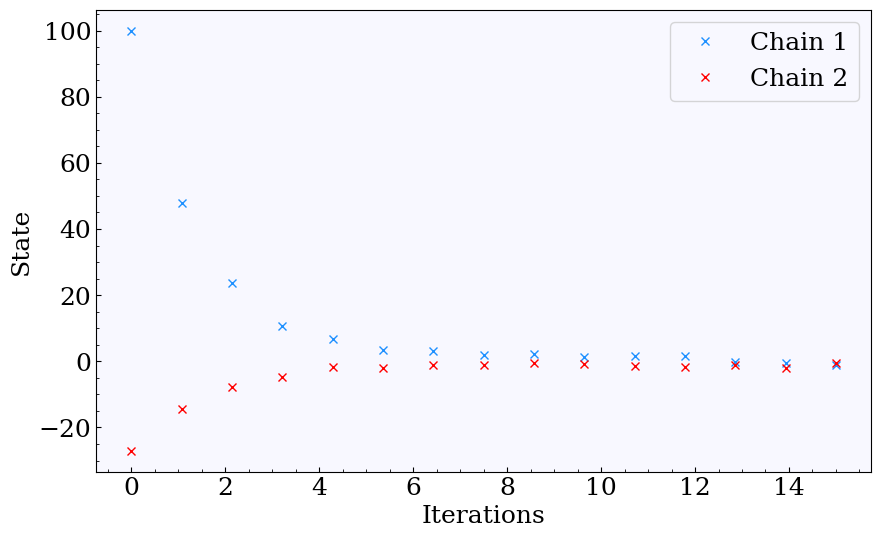

In [28]:
axis = np.linspace(0, N_iterations, N_iterations)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(axis, chain1, 'x', label=r'Chain 1')
ax.plot(axis, chain2, 'x', label=r'Chain 2')

ax.set_xlabel(r'Iterations')
ax.set_ylabel(r'State')
ax.legend()

# Exercise 3

In [71]:
# Monte Carlo Markoc Chain repeat of exercise 1 

def proposal_func(x):
    x_proposal = x + np.random.normal(0, 0.3, 1)
    return x_proposal


def Metropolis_Hastings(prior, likelihood, N_iterations, proposal_func, x0):

    state = np.zeros(N_iterations) 
    state[0] = x0      # Initialize chain with starting value

    for i in range(1, N_iterations):
        
        x_current = state[i-1]
        x_proposal = proposal_func(x_current)

        while x_proposal < 0 or x_proposal > 1:
            x_proposal = proposal_func(x_current)

        P_current = beta_distribution(x_current, alpha, beta) * binomial_distribution(p, n, x_current)
        P_proposal = beta_distribution(x_proposal, alpha, beta) * binomial_distribution(p, n, x_proposal)

        P_accept = min(1, P_proposal / P_current)

        if np.random.rand() < P_accept:
            state[i] = x_proposal
        else:
            state[i] = x_current

    return state


In [79]:
MCMC_chain1 = Metropolis_Hastings(prior, likelihood, 3000, proposal_func, 0.5)

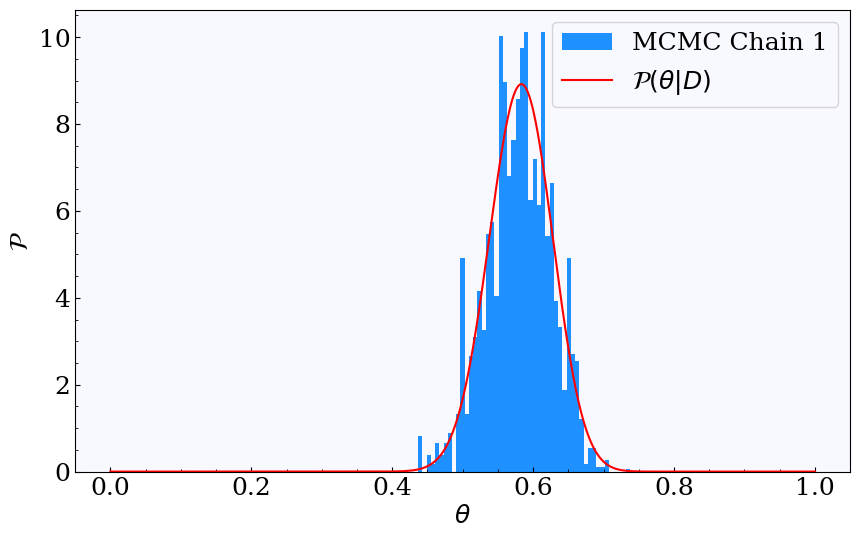

In [81]:
# Plot the results

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(MCMC_chain1, bins=50, density=True, label=r'MCMC Chain 1')
ax.plot(p_range, posterior, label=r'$\mathcal{P}(\theta|D)$')

ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\mathcal{P}$')
ax.legend()